<ul>
<li>Name : <b>Muhammad Ayaz</b></li>
<li>C/No : <b>221331</b></li>
<li>Subject : <b>Artificial Intelligence</b></li>
<li>Submitted to : <b>Dr. Muhammad Sajjad</b></li>
</ul>

<h1> 1. What is Overfitting?</h1>
<h4>
Overfitting happens when a model learns not just the real pattern, 
but also the noise in training data. It performs well on training data 
but poorly on unseen/test data.
</h4>

<h1>✨ 2. What is Regularization?</h1>
<h4>
Regularization is a technique used to reduce overfitting by adding 
a penalty to the model complexity (usually weights). 
It helps keep the model simpler and generalizes better.
</h4>

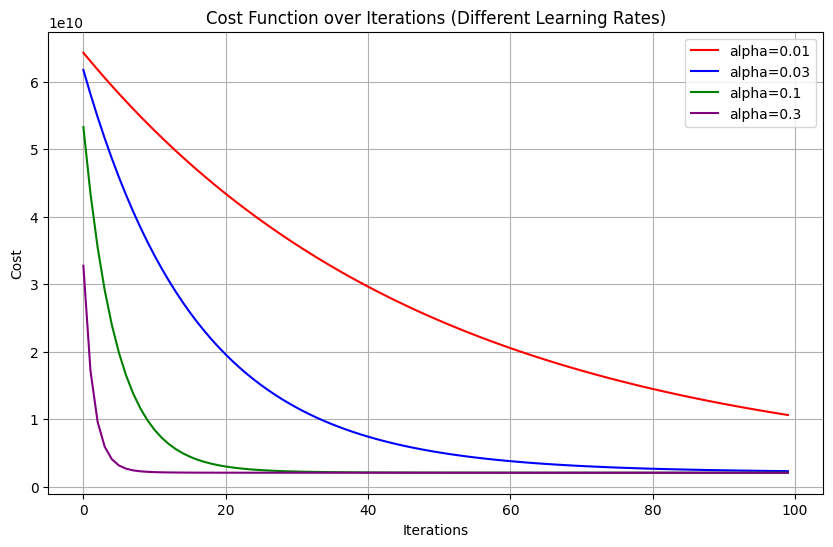

In [ ]:
# 📌 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 📌 Step 2: Load Data
data = pd.read_csv("data.csv")
data
X = data[['Size (sqft)', 'Bedrooms']].values
y = data['Price'].values.reshape(-1, 1)

# 📌 Step 3: Feature Scaling
# Helps gradient descent converge faster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias unit (intercept) as the first column
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# 📌 Step 4: Cost Function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# 📌 Step 5: Gradient Descent Function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# 📌 Step 6: Try Multiple Learning Rates
learning_rates = [0.01, 0.03, 0.1, 0.3]
num_iters = 100
colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(10, 6))
for alpha, color in zip(learning_rates, colors):
    theta = np.zeros((X_scaled.shape[1], 1))
    _, cost_history = gradient_descent(X_scaled, y, theta, alpha, num_iters)
    plt.plot(range(num_iters), cost_history, label=f'alpha={alpha}', color=color)

plt.title('Cost Function over Iterations (Different Learning Rates)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 🧠 Linear Regression Assignment with Regularization

# 📌 Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error





# -----------------------------------------
# 🎯 Step 1: Generate Dataset with Overfitting
# -----------------------------------------

np.random.seed(42)

# Generate synthetic data
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.2  # sin curve with noise

# Introduce overfitting using a high-degree polynomial (degree=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# -----------------------------------------
# 📈 Step 2: Linear Regression without Regularization
# -----------------------------------------

degree = 15  # high degree causes overfitting

model_overfit = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_overfit.fit(X_train, y_train)

y_pred_train = model_overfit.predict(X_train)
y_pred_test = model_overfit.predict(X_test)

# Formula (Linear Regression):
# y = w1*x1 + w2*x2 + ... + wn*xn + b
# Goal: minimize Mean Squared Error (MSE)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("📊 Linear Regression (No Regularization):")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# -----------------------------------------
# 🔒 Step 3: Linear Regression WITH Regularization (Ridge)
# -----------------------------------------

model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
model_ridge.fit(X_train, y_train)

y_pred_ridge_train = model_ridge.predict(X_train)
y_pred_ridge_test = model_ridge.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, y_pred_ridge_train)
ridge_test_mse = mean_squared_error(y_test, y_pred_ridge_test)

# Formula (Ridge Regression - L2 Regularization):
# Loss = MSE + λ * Σ(w^2)
# Where λ is the regularization strength

print("\n🔒 Ridge Regression (With Regularization):")
print("Train MSE:", ridge_train_mse)
print("Test MSE:", ridge_test_mse)

# -----------------------------------------
# 📊 Step 4: Plot Results
# -----------------------------------------

plt.figure(figsize=(12, 5))

# Without regularization
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='lightgray', label='Data')
plt.plot(X, model_overfit.predict(X), color='red', label='No Regularization')
plt.title("Overfitting Model")
plt.legend()

# With regularization
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='lightgray', label='Data')
plt.plot(X, model_ridge.predict(X), color='green', label='With Ridge Regularization')
plt.title("Regularized Model")
plt.legend()

plt.show()



<h1>📘 Part 2: Logistic Regression - With and Without Regularization</h1>

📊 Logistic Regression (No Regularization):
Train Accuracy: 0.9523809523809523
Test Accuracy: 0.9333333333333333

🔒 Logistic Regression (With Regularization):
Train Accuracy: 0.9095238095238095
Test Accuracy: 0.9


C:\Users\Best Computers\AppData\Local\Temp\ipykernel_16512\2718012247.py:85: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Best Computers\AppData\Local\Temp\ipykernel_16512\2718012247.py:85: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


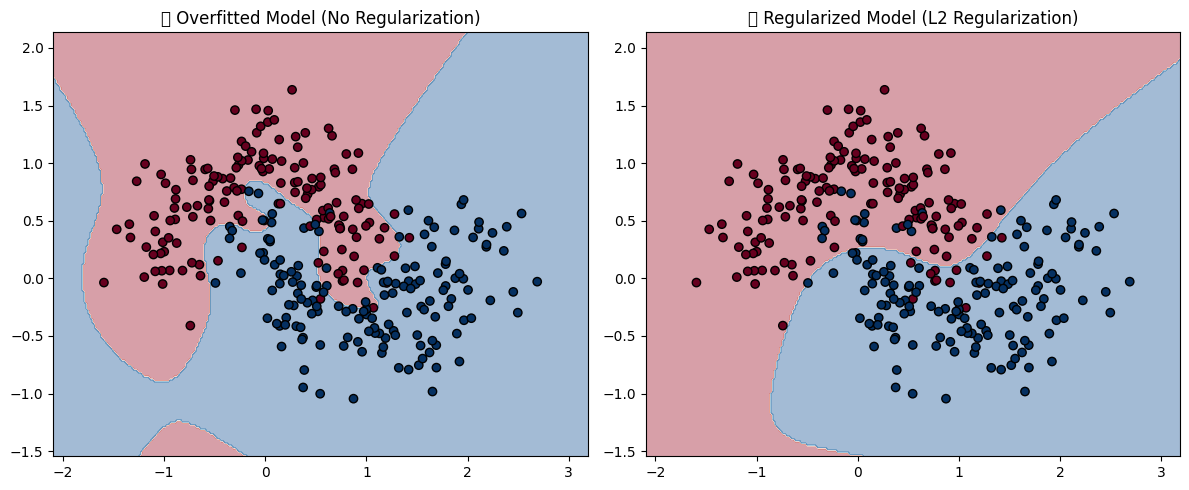

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# -----------------------------------------
# 🎯 Step 1: Generate Dataset (Classification with Overfitting)
# -----------------------------------------

X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------------------
# 🔍 Step 2: Logistic Regression WITHOUT Regularization
# -----------------------------------------

# Use high-degree polynomial to induce overfitting
degree = 8

model_no_reg = make_pipeline(PolynomialFeatures(degree), LogisticRegression(C=1e6, max_iter=10000))
model_no_reg.fit(X_train, y_train)

train_acc_no_reg = accuracy_score(y_train, model_no_reg.predict(X_train))
test_acc_no_reg = accuracy_score(y_test, model_no_reg.predict(X_test))

print("📊 Logistic Regression (No Regularization):")
print("Train Accuracy:", train_acc_no_reg)
print("Test Accuracy:", test_acc_no_reg)

# Formula:
# Sigmoid:   p(y=1|x) = 1 / (1 + exp(-(w·x + b)))
# Loss (Log Loss): -[y log(p) + (1 - y) log(1 - p)]
# Without regularization → no penalty on model complexity

# -----------------------------------------
# 🔒 Step 3: Logistic Regression WITH Regularization
# -----------------------------------------

# Ridge-style L2 regularization (smaller C = more regularization)
model_reg = make_pipeline(PolynomialFeatures(degree), LogisticRegression(C=0.1, max_iter=10000))
model_reg.fit(X_train, y_train)

train_acc_reg = accuracy_score(y_train, model_reg.predict(X_train))
test_acc_reg = accuracy_score(y_test, model_reg.predict(X_test))

print("\n🔒 Logistic Regression (With Regularization):")
print("Train Accuracy:", train_acc_reg)
print("Test Accuracy:", test_acc_reg)

# Formula:
# Regularized Loss = Log Loss + λ * Σ(w²)
# Where λ = 1 / C

# -----------------------------------------
# 📊 Step 4: Plot Decision Boundaries
# -----------------------------------------

def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
    ax.set_title(title)
    return scatter

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(model_no_reg, X, y, "❌ Overfitted Model (No Regularization)", axes[0])
plot_decision_boundary(model_reg, X, y, "✅ Regularized Model (L2 Regularization)", axes[1])

plt.tight_layout()
plt.show()
